# Dataset Preprocessing

In this notebook we are performing all the tasks related with the datapreprocessing. We start by checking the missing values and the outliers and then, once they are detected, we delete it from our dataset. Finnaly, we transform the categorical columns into values as it would be easy for our models to get results if those columns are integers rather than strings. 

## Imports

In [33]:
import copy
import numpy as np
import pandas as pd
import seaborn as sn
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

## Utils

In [2]:
def print_information_about_dataset(df):
    for it, key in enumerate(df.keys()): print(it, key, len(df[df[key].notna()]))
    print('From the dataset, after deleting the NaN values, we have found that we have only', 
            len(df[~df.isnull().any(axis=1)]), 'rows remaining.')

In [3]:
def delete_from_dataframe(df, delete_keys):
    for key in delete_keys:
        del df[key]
    return df

In [4]:
def replace_string_to_int_dataframe(df, keys, input):
    for keys, inp in zip(keys, input):
        df[keys].replace(inp, list(range(len(inp))), inplace=True)
    return df

In [5]:
def dataframe_to_dictionary(df, key, continue_list=None):
    result = dict()
    for _key, _val in zip(df[key].keys(), df[key].values):
        if _key not in continue_list:
            result[_key] = _val
    return result

In [6]:
def make_plots(df, plot=0, objective_vars=2):
    corr_matrix = df.corr()
    if objective_vars == 2:
        home_team = dataframe_to_dictionary(corr_matrix, 'home_team_score', ['home_team_score', 'away_team_score'])
        away_team = dataframe_to_dictionary(corr_matrix, 'away_team_score', ['home_team_score', 'away_team_score'])

        home_team = dict(sorted(home_team.items(), key=lambda item: item[1]))
        away_team = dict(sorted(away_team.items(), key=lambda item: item[1]))
    elif objective_vars == 1:
        home_team = dataframe_to_dictionary(corr_matrix, 'result', ['result'])
        home_team = dict(sorted(home_team.items(), key=lambda item: item[1]))

    if plot == 0:
        fig, ax = plt.subplots(objective_vars+1, 1)
        ax[0].matshow(corr_matrix)
        ax[0].set_title('Correlation Matrix', fontsize=8)
        ax[0].set_xticklabels(list(range(len(corr_matrix.keys()))), fontsize=5)
        ax[0].set_yticklabels(list(corr_matrix.keys()), fontsize=5)

        ax[1].set_title('Home Team Variables Correlation', fontsize=8)
        ax[1].barh(list(home_team.keys()), list(home_team.values()))
        ax[1].set_yticklabels(list(home_team.keys()), fontsize=5)
        
        if objective_vars == 2:
            ax[2].set_title('Away Team Variables Correlation', fontsize=8)
            ax[2].barh(list(away_team.keys()), list(away_team.values()))
            ax[2].set_yticklabels(list(away_team.keys()), fontsize=5)

        fig.tight_layout()

    elif plot == 1:
        plt.matshow(corr_matrix)
        plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
        plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
        plt.colorbar()

    elif plot == 2:
        plt.title('Home Team Variables Correlation')
        plt.barh(list(home_team.keys()), list(home_team.values()))
        plt.yticks(list(home_team.keys()))

    elif plot == 3:
        plt.title('Away Team Variables Correlation')
        plt.barh(list(away_team.keys()), list(away_team.values()))
        plt.yticks(list(away_team.keys()))
    
    elif plot == 4:
        plt.title('Result Variable Correlation')
        plt.barh(list(home_team.keys()), list(home_team.values()))
        plt.yticks(list(home_team.keys()))

    plt.show()

## Main

In [7]:
df = pd.read_csv('../../Data/international_matches.csv', delimiter=';')
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,tournament,...,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,home_team_score,away_team_score
0,8/8/93,Bolivia,Uruguay,South America,South America,59,22,0,0,FIFA World Cup qualification,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1
1,8/8/93,Brazil,Mexico,South America,North America,8,14,0,0,Friendly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2,8/8/93,Ecuador,Venezuela,South America,South America,35,94,0,0,FIFA World Cup qualification,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0
3,8/8/93,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,Friendly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,8/8/93,Paraguay,Argentina,South America,South America,67,5,0,0,FIFA World Cup qualification,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3


In [8]:
print_information_about_dataset(df)

0 date 23921
1 home_team 23921
2 away_team 23921
3 home_team_continent 23921
4 away_team_continent 23921
5 home_team_fifa_rank 23921
6 away_team_fifa_rank 23921
7 home_team_total_fifa_points 23921
8 away_team_total_fifa_points 23921
9 tournament 23921
10 city 23921
11 country 23921
12 neutral_location 23921
13 shoot_out 23921
14 home_team_result 23921
15 home_team_goalkeeper_score 8379
16 away_team_goalkeeper_score 8095
17 home_team_mean_defense_score 7787
18 home_team_mean_offense_score 8510
19 home_team_mean_midfield_score 8162
20 away_team_mean_defense_score 7564
21 away_team_mean_offense_score 8312
22 away_team_mean_midfield_score 7979
23 home_team_score 23921
24 away_team_score 23921
From the dataset, after deleting the NaN values, we have found that we have only 4303 rows remaining.


In [9]:
df_without_NaN = df[~df.isnull().any(axis=1)]
df_without_NaN.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,tournament,...,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,home_team_score,away_team_score
8264,3/9/04,Spain,Scotland,Europe,Europe,3,67,0,0,Friendly,...,94.0,84.0,86.5,89.3,89.5,80.2,79.7,81.8,1,1
8266,4/9/04,Austria,England,Europe,Europe,90,7,0,0,FIFA World Cup qualification,...,83.0,88.0,76.2,73.0,74.0,90.5,88.7,91.2,2,2
8271,4/9/04,Croatia,Hungary,Europe,Europe,25,76,0,0,FIFA World Cup qualification,...,77.0,74.0,80.5,78.7,79.0,71.8,75.7,70.2,3,0
8276,4/9/04,Iceland,Bulgaria,Europe,Europe,80,41,0,0,FIFA World Cup qualification,...,78.0,78.0,68.8,77.0,69.2,70.5,79.7,78.5,1,3
8278,4/9/04,Italy,Norway,Europe,Europe,9,38,0,0,FIFA World Cup qualification,...,97.0,79.0,91.8,92.3,87.5,79.2,81.3,79.0,2,1


In [10]:
df_without_NaN_UnusedVars = copy.deepcopy(df_without_NaN)
delete_keys = ['date', 'home_team', 'away_team', 'tournament', 'city', 'country', 'neutral_location', 'home_team_result']
df_without_NaN_UnusedVars = delete_from_dataframe(df_without_NaN_UnusedVars, delete_keys)
df_without_NaN_UnusedVars.head()

,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,shoot_out,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,home_team_score,away_team_score
8264,Europe,Europe,3,67,0,0,No,94.0,84.0,86.5,89.3,89.5,80.2,79.7,81.8,1,1
8266,Europe,Europe,90,7,0,0,No,83.0,88.0,76.2,73.0,74.0,90.5,88.7,91.2,2,2
8271,Europe,Europe,25,76,0,0,No,77.0,74.0,80.5,78.7,79.0,71.8,75.7,70.2,3,0
8276,Europe,Europe,80,41,0,0,No,78.0,78.0,68.8,77.0,69.2,70.5,79.7,78.5,1,3
8278,Europe,Europe,9,38,0,0,No,97.0,79.0,91.8,92.3,87.5,79.2,81.3,79.0,2,1


In [11]:
df_without_NaN_UnusedVars_KeysReplaced = copy.deepcopy(df_without_NaN_UnusedVars)
replace_keys = ['home_team_continent', 'away_team_continent', 'shoot_out']
replace_input = [['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'], ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'], ['No', 'Yes']]
df_without_NaN_UnusedVars_KeysReplaced = replace_string_to_int_dataframe(df_without_NaN_UnusedVars_KeysReplaced, replace_keys, replace_input)

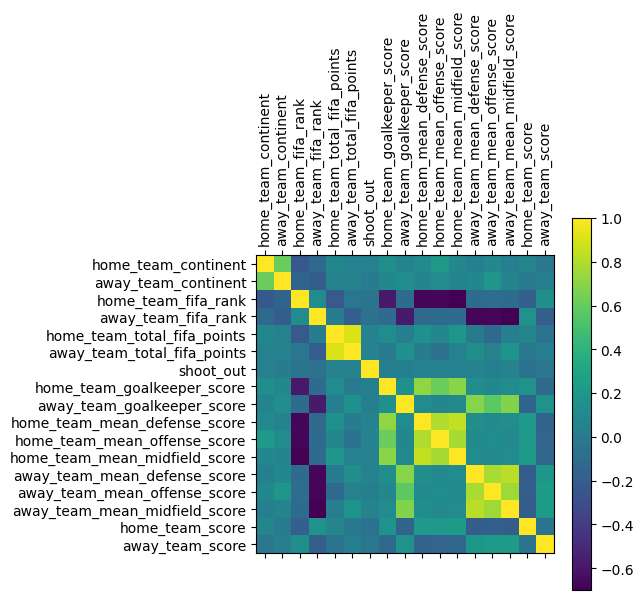

In [12]:
make_plots(df_without_NaN_UnusedVars_KeysReplaced, 1)

## Modificación de la Variable Objetivo

In [13]:
df_without_NaN_UnusedVars_KeysReplaced_OneObjectiveVar = copy.deepcopy(df_without_NaN_UnusedVars_KeysReplaced)
df_without_NaN_UnusedVars_KeysReplaced_OneObjectiveVar['result'] = df_without_NaN_UnusedVars_KeysReplaced_OneObjectiveVar.apply(lambda row: row.home_team_score - row.away_team_score, axis=1)
delete_keys = ['home_team_score','away_team_score']
df_without_NaN_UnusedVars_KeysReplaced_OneObjectiveVar = delete_from_dataframe(df_without_NaN_UnusedVars_KeysReplaced_OneObjectiveVar, delete_keys)

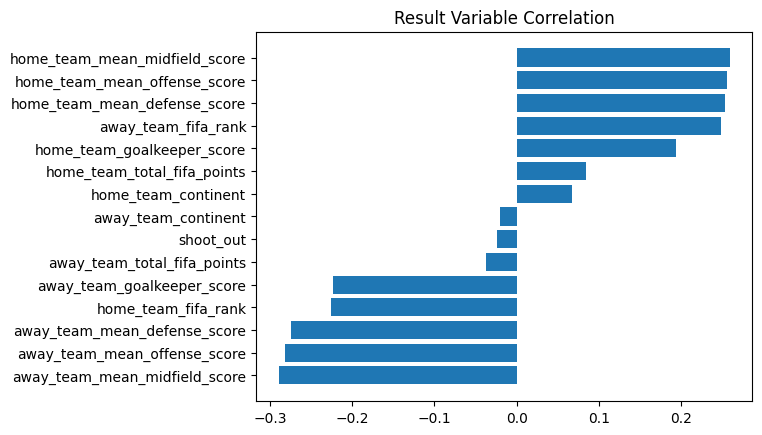

In [16]:
make_plots(df_without_NaN_UnusedVars_KeysReplaced_OneObjectiveVar, 4, objective_vars=1)

## Redución de la dimensionalidad

In [17]:
df_pca = copy.deepcopy(df_without_NaN_UnusedVars_KeysReplaced_OneObjectiveVar)
del df_pca['result']

In [19]:
df_pca.head()

,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,shoot_out,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
8264,2,2,3,67,0,0,0,94.0,84.0,86.5,89.3,89.5,80.2,79.7,81.8
8266,2,2,90,7,0,0,0,83.0,88.0,76.2,73.0,74.0,90.5,88.7,91.2
8271,2,2,25,76,0,0,0,77.0,74.0,80.5,78.7,79.0,71.8,75.7,70.2
8276,2,2,80,41,0,0,0,78.0,78.0,68.8,77.0,69.2,70.5,79.7,78.5
8278,2,2,9,38,0,0,0,97.0,79.0,91.8,92.3,87.5,79.2,81.3,79.0


In [26]:
myPCA = PCA().fit(df_pca)

print(myPCA.explained_variance_ratio_)
print(myPCA.explained_variance_ratio_.cumsum())

[9.51999267e-01 4.63222156e-02 1.06218505e-03 4.12519273e-04
 6.90969936e-05 5.61113226e-05 2.48906833e-05 2.02246370e-05
 9.62578137e-06 7.74516525e-06 6.15100258e-06 5.34654148e-06
 3.61603608e-06 9.84522514e-07 2.04708369e-08]
[0.95199927 0.99832148 0.99938367 0.99979619 0.99986528 0.9999214
 0.99994629 0.99996651 0.99997614 0.99998388 0.99999003 0.99999538
 0.999999   0.99999998 1.        ]


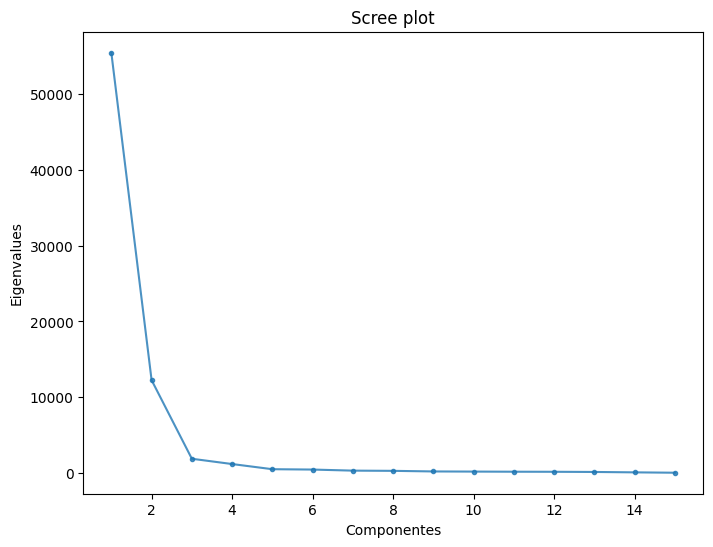

In [27]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(myPCA.singular_values_ )+1),myPCA.singular_values_ ,alpha=0.8,marker='.');
y_label = plt.ylabel('Eigenvalues');
x_label = plt.xlabel('Componentes');
plt.title('Scree plot');

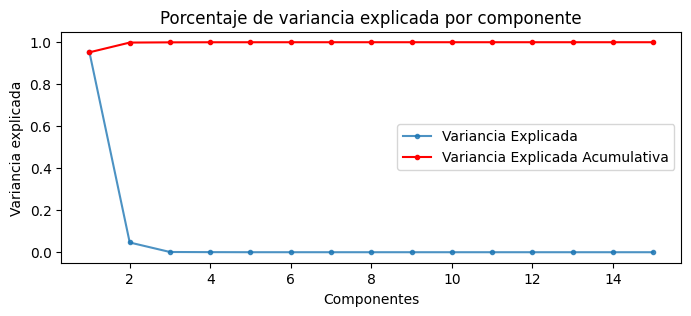

In [28]:
fig = plt.figure(figsize=(8,3));
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),myPCA.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia Explicada Acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

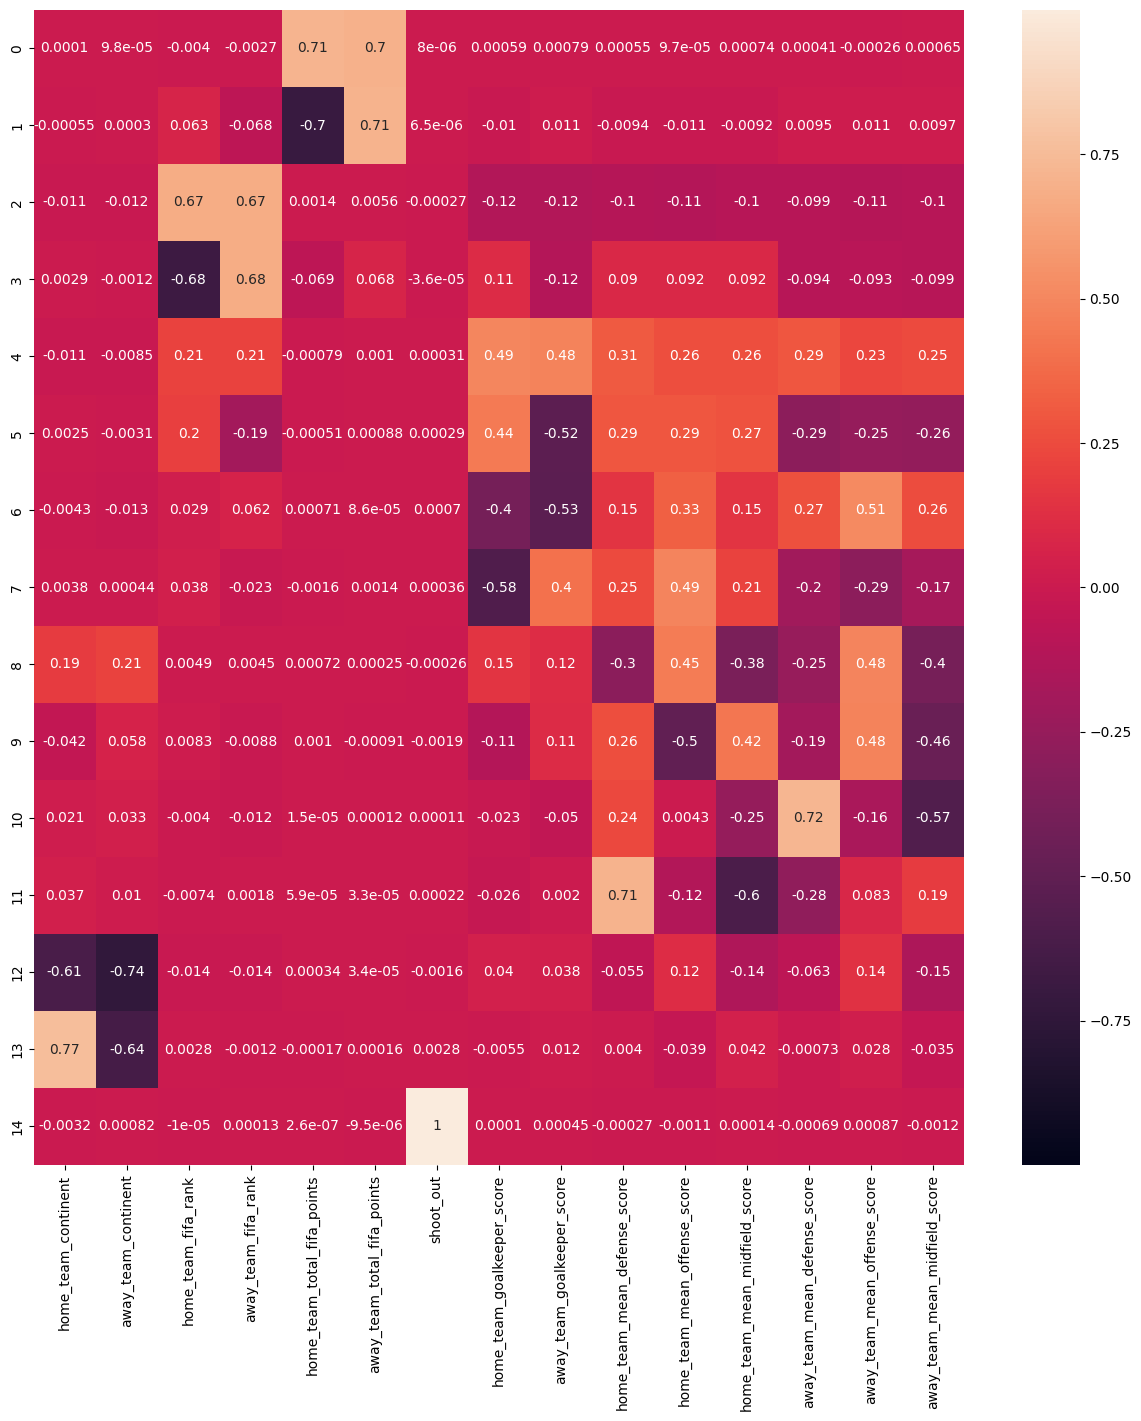

In [29]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sn.heatmap(myPCA.components_,  
            xticklabels=list(df_pca.columns),
            vmin=-np.max(np.abs(myPCA.components_)),
            vmax=np.max(np.abs(myPCA.components_)),
            annot=True);

In [31]:
transformed_crabs = myPCA.transform(df_pca[df_pca.columns])
df_pca[['PC1','PC2', 'PC3']] = transformed_crabs[:,:3]

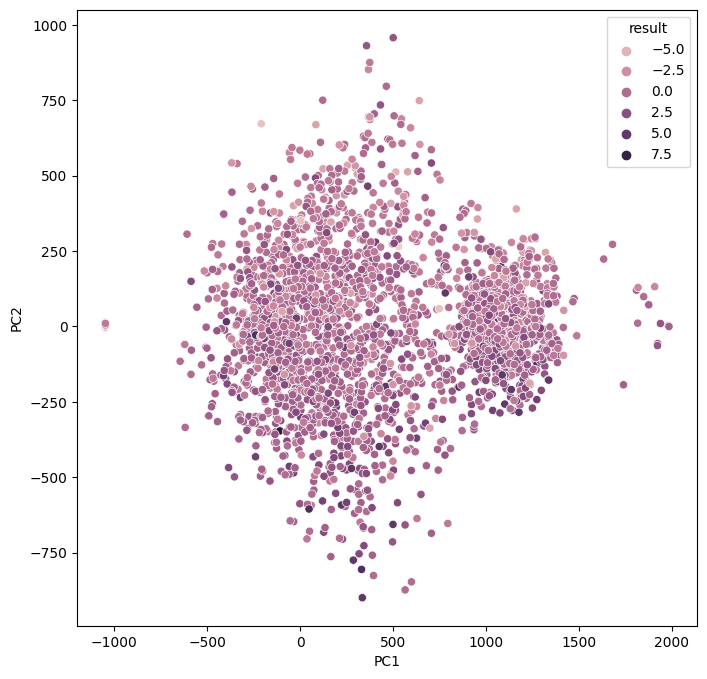

In [34]:
fig = plt.figure(figsize=(8,8))
_ = sn.scatterplot(x='PC1', y='PC2', hue=df_without_NaN_UnusedVars_KeysReplaced_OneObjectiveVar['result'] ,data=df_pca, legend=True)

In [35]:
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3',
              color=df_without_NaN_UnusedVars_KeysReplaced_OneObjectiveVar['result'])
fig.show()

## Guardar Conjunto De Datos

In [92]:
df_without_NaN_UnusedVars_KeysReplaced.to_csv('../../Data/international_matches_clean.csv', index=False)